(                       close        day
 time                                   
 2023-10-04 03:00:00  1.37437  Wednesday
 2023-10-05 03:00:00  1.37062   Thursday
 2023-10-06 03:00:00  1.36613     Friday
 2023-10-09 03:00:00  1.35796     Monday
 2023-10-10 03:00:00  1.35832    Tuesday
 ...                      ...        ...
 2024-11-28 03:00:00  1.40073   Thursday
 2024-11-29 03:00:00  1.39998     Friday
 2024-12-02 03:00:00  1.40457     Monday
 2024-12-03 03:00:00  1.40646    Tuesday
 2024-12-04 03:00:00  1.40730  Wednesday
 
 [306 rows x 2 columns],
 <Axes: xlabel='day', ylabel='close'>)

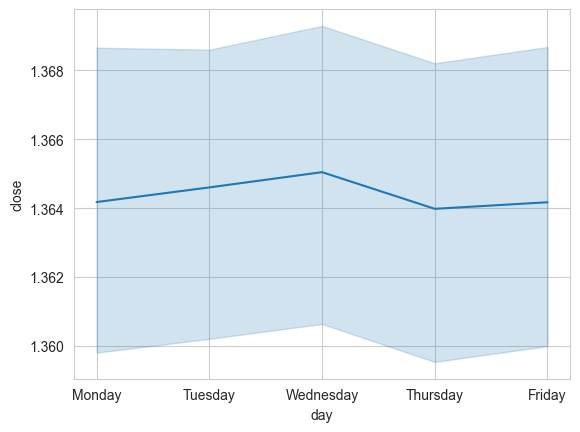

In [4]:
from models.ts.seasonality import daily, sessional, hourly

currency = "USDCAD"

daily(currency, 1)

(                       close       session
 time                                      
 2023-07-13 03:00:00  1.31818   Tokyo(0300)
 2023-07-13 06:00:00  1.31844   Tokyo(0300)
 2023-07-13 09:00:00  1.31595   Tokyo(0300)
 2023-07-14 03:00:00  1.30973   Tokyo(0300)
 2023-07-14 06:00:00  1.31017   Tokyo(0300)
 ...                      ...           ...
 2024-11-29 00:00:00  1.40073  Sydney(2200)
 2024-11-30 00:00:00  1.39998  Sydney(2200)
 2024-12-02 00:00:00  1.40127  Sydney(2200)
 2024-12-03 00:00:00  1.40457  Sydney(2200)
 2024-12-04 00:00:00  1.40646  Sydney(2200)
 
 [1540 rows x 2 columns],
 <Axes: title={'center': 'Average Sessional Close Prices for USDCAD (Last 12 Months)'}, xlabel='session', ylabel='close'>)

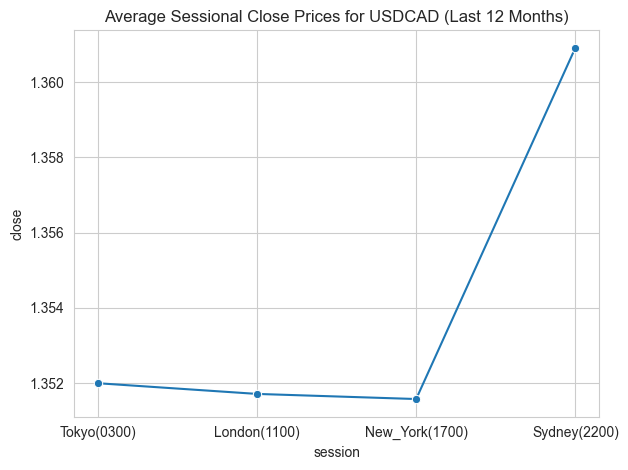

In [5]:
sessional(currency, 1)

(                       close  hour
 time                              
 2023-07-07 23:00:00  1.32757    23
 2023-07-10 00:00:00  1.32750     0
 2023-07-10 01:00:00  1.32764     1
 2023-07-10 02:00:00  1.32777     2
 2023-07-10 03:00:00  1.32829     3
 ...                      ...   ...
 2024-12-04 01:00:00  1.40657     1
 2024-12-04 02:00:00  1.40646     2
 2024-12-04 03:00:00  1.40734     3
 2024-12-04 04:00:00  1.40708     4
 2024-12-04 05:00:00  1.40732     5
 
 [8766 rows x 2 columns],
 <Axes: title={'center': 'Average Hourly Close Prices for USDCAD (Last 12 Months)'}, xlabel='hour', ylabel='close'>)

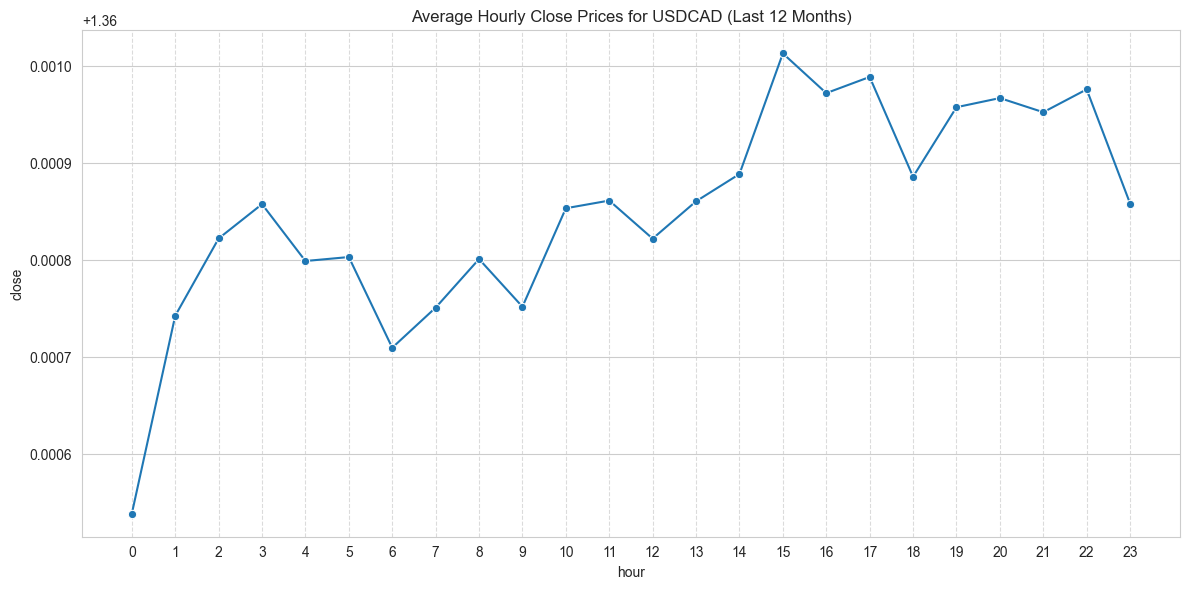

In [6]:
hourly(currency, 1)